# Notebookquelle

Erstellt von einem TensorFlow Tutorial Notebook:

https://www.tensorflow.org/tutorials/generative/autoencoder#overview

# Datensatzquelle

http://www.timeseriesclassification.com/dataset.php

# Datensatz laden

In [1]:
import pandas as pd
# Download the dataset
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.to_csv("ecg.csv")
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


# Label aus Tabelle absplitten

In [2]:
from sklearn.model_selection import train_test_split

# The last element contains the labels
labels = raw_data[:, -1]

# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)


In [3]:
labels.shape

(4998,)

In [4]:
labels

array([1., 1., 1., ..., 0., 0., 0.])

In [5]:
data.shape

(4998, 140)

# Normalisieren der Daten zu [0,1]

In [6]:
import tensorflow as tf

min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

2023-11-30 20:58:41.971714: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-30 20:58:42.013078: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-30 20:58:42.013108: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-30 20:58:42.013134: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-30 20:58:42.020944: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-30 20:58:42.022048: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [7]:
train_data.shape

TensorShape([3998, 140])

In [8]:
test_data.shape

TensorShape([1000, 140])

# Separieren der normalen und abnormalen ECG Rythmen

In [9]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

In [10]:
train_labels[:20]

array([ True,  True,  True, False,  True,  True,  True, False,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
       False,  True])

In [11]:
train_labels.shape

(3998,)

In [12]:
test_labels[:20]

array([ True, False,  True,  True, False,  True,  True,  True, False,
        True,  True,  True, False,  True, False,  True,  True,  True,
       False, False])

In [13]:
test_labels.shape

(1000,)

In [14]:
normal_train_data.shape

TensorShape([2359, 140])

In [15]:
normal_test_data.shape

TensorShape([560, 140])

In [16]:
anomalous_train_data.shape

TensorShape([1639, 140])

In [17]:
anomalous_test_data.shape

TensorShape([440, 140])

# Beispiel eines normalen ECGs

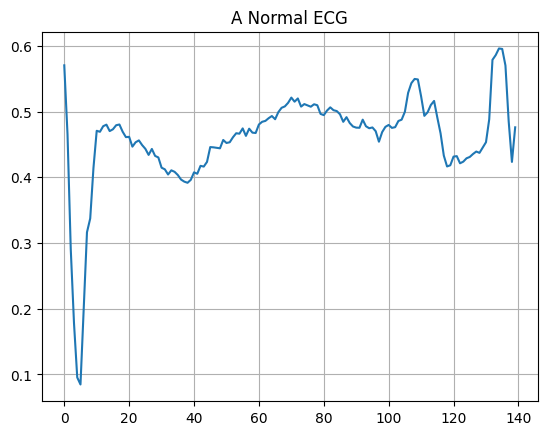

In [18]:
import matplotlib.pyplot as plt
import numpy as np
plt.grid()
plt.plot(np.arange(140), normal_train_data[0])
plt.title("A Normal ECG")
plt.show()

# Beispiel eines abnormalen ECGs

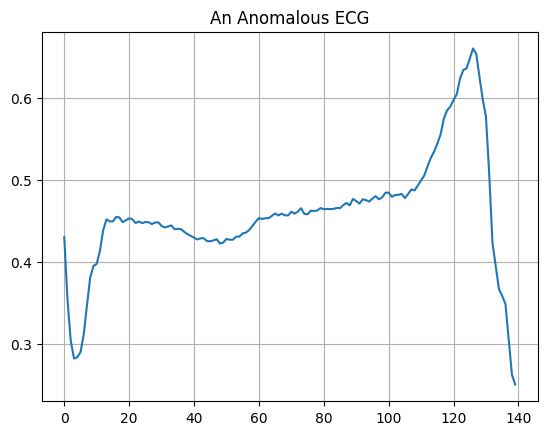

In [19]:
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[0])
plt.title("An Anomalous ECG")
plt.show()

# Aufbau eines Autoencoder Models in Keras

In [20]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers, losses

class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])

    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(140, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

autoencoder.compile(optimizer='adam', loss='mae')

# Trainiere den Autoencoder

In [21]:
history = autoencoder.fit(normal_train_data, normal_train_data, 
          epochs=20, 
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True)

Epoch 1/20
5/5 [==============================] - 1s 44ms/step - loss: 0.0577 - val_loss: 0.0530
Epoch 2/20
5/5 [==============================] - 0s 9ms/step - loss: 0.0554 - val_loss: 0.0515
Epoch 3/20
5/5 [==============================] - 0s 14ms/step - loss: 0.0525 - val_loss: 0.0499
Epoch 4/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0488 - val_loss: 0.0489
Epoch 5/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0453 - val_loss: 0.0467
Epoch 6/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0420 - val_loss: 0.0448
Epoch 7/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0391 - val_loss: 0.0436
Epoch 8/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0364 - val_loss: 0.0421
Epoch 9/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0341 - val_loss: 0.0409
Epoch 10/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0320 - val_loss: 0.0398
Epoch 11/20
5/5 [=============

# Plotten des Trainingsverlaufs

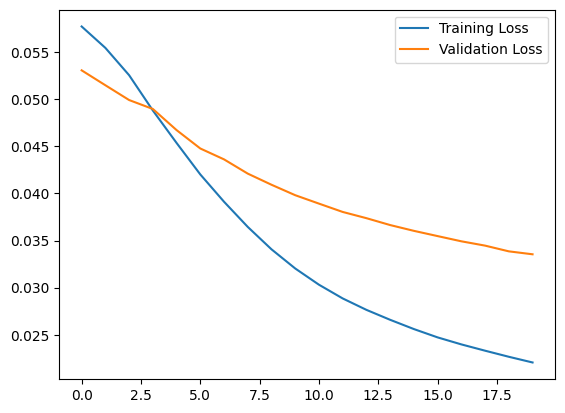

In [22]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

# Plotten eines rekonstruierten normalen ECGs

In [23]:
normal_test_data.shape

TensorShape([560, 140])

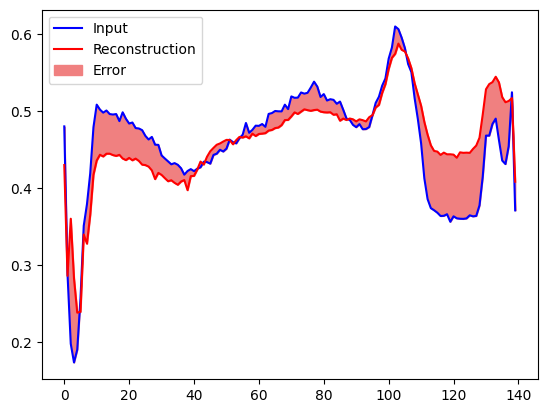

In [24]:
encoded_data = autoencoder.encoder(normal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

# Plotten eines rekonstruierten abnormalen ECGs

In [25]:
anomalous_test_data.shape

TensorShape([440, 140])

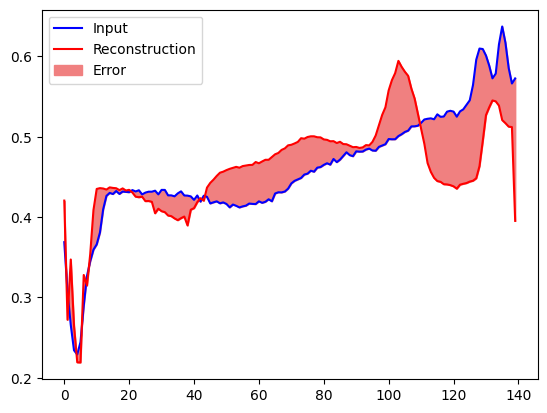

In [26]:
encoded_data = autoencoder.encoder(anomalous_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(anomalous_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], anomalous_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

In [27]:
encoded_data.shape

(440, 8)

In [28]:
decoded_data.shape

(440, 140)

# Rekonstruktionsfehler bei normalen ECGs analyiseren

74/74 [==============================] - 0s 2ms/step


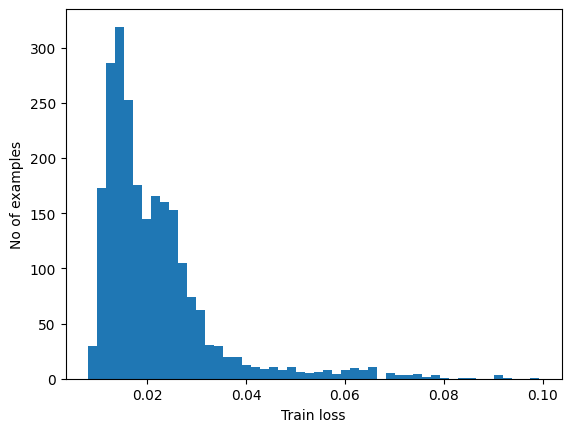

In [29]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

# Festlegen einer Fehlerschwelle

In [30]:
# Choose a threshold value that is one standard deviations above the mean.
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.033459242


# Rekonstruktionsfehler bei abnormalen ECGs analyiseren

14/14 [==============================] - 0s 2ms/step


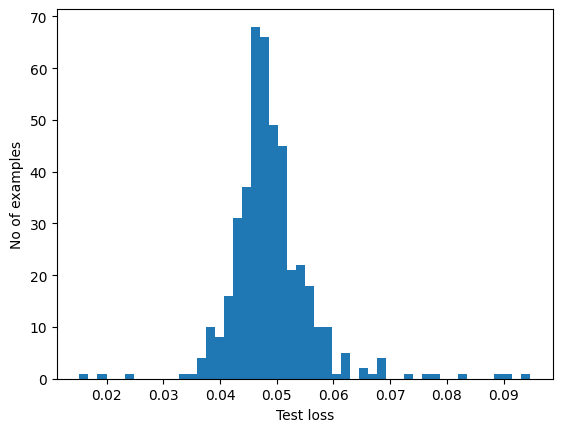

In [31]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

# Anomaliedetektion

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  #print("Precision = {}".format(precision_score(labels, predictions)))
  #print("Recall = {}".format(recall_score(labels, predictions)))

In [33]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.945
